# Simple layered neural network

For readers who are new here, take a look at the previous [notebook](https://github.com/rajcscw/minimalistic-ml/blob/master/single-neuron-classifier/single-neuron-classifier.ipynb) , in which we worked our way to implement a simple classifier using a single neuron, which gave an accuracy of 85%. Now, in this post, we add more neurons to our classifier model and try to improve the accuracy. In particular, we are going to work with a layered neural network. Let's consider a simple setup: we have 3 layers in our network (as shown below), first layer is the input layer $i$ (consisting of two neurons), second layer is the hidden layer $h$ (consisting of three neurons) and the third layer is the output layer $o$ (consisting of two neurons). You may have figured out already, this network takes two inputs and produces two outputs.

<img src="https://rawgit.com/rajcscw/minimalistic-ml/master/simple-layered-neural-network/simple_layered_nn.svg" style="float: center; width: 20%;">

Recall from the single neuron example, each neuron has to store the weights of its input connections and a bias. Now that we are working with a layer of neurons, it makes sense to store the weights and bias for each layer. You will soon appreciate this layered approach. The weights of the connections from input layer $i$ to hidden layer $h$ are stored in the matrix $W_{ih}$ and similary from hidden layer $h$ to output layer are stored in the matrix $W_{ho}$. The bias of the hidden layer $bi_h$ and output layer $bi_o$. Also, at point of time, the values that each node carries is represented as $a$, $b$, $c$, .. $g$

\begin{align}
W_{ih}=
\begin{bmatrix}
    ac  &  bc      \\
    ad  &  bd      \\ 
    ae  &  be      \\
\end{bmatrix}
, W_{ho}=
\begin{bmatrix}
    cf  &  df & ef     \\
    cg  &  dg & eg     \\     
\end{bmatrix} 
\end{align}

\begin{align}
bi_{h}=
\begin{bmatrix}
    bi_c      \\
    bi_d      \\
    bi_e      \\
\end{bmatrix}
, bi_{o}=
\begin{bmatrix}
    bi_f     \\
    bi_g      \\
\end{bmatrix}
\end{align}

The training of such a neural network to accomplish any given task boils down to finding optimal values for the above mentioned matrices. For each data point, this is done in two steps: (i) forward pass (finding output of the whole network) and (ii) adjusting these matrices based on the error in the output. And we repeat this iteratively many times until the model becomes accurate.

## Forward pass

First, we place the inputs on the input layer ie. set the value of nodes $a$ and $b$ in input layer to the input $X = \begin{bmatrix}x_1 \\x_2\end{bmatrix}$ ie. $\begin{bmatrix}a      \\b      \\\end{bmatrix}=\begin{bmatrix}x_1      \\x_2      \\\end{bmatrix}$. Next, we compute the output of the node $c$ in the hidden layer $h$ which is just the weighted sum of inputs flowing in along with addition of bias $bi_c$ followed by application of activation function. Let's write the equations for other nodes $d$ and $e$ as well:
\begin{align}
c = tanh(ac . a + bc . b + bi_c)
\end{align}
\begin{align}
d = tanh(ad . a + bd . b + bi_d)
\end{align}
\begin{align}
e = tanh(ae . a + be . b + bi_e)
\end{align}

But finding outputs node by node becomes tedious quickly. Instead, we can compute output of the hidden layer $out_h$ which can be easily computed using matrix multiplication as:

\begin{align}
out_h = 
\begin{bmatrix}
    c      \\
    d      \\
    e      \\
\end{bmatrix}
& =
tanh(
\begin{bmatrix}
    ac  &  bc      \\
    ad  &  bd      \\ 
    ae  &  be      \\
\end{bmatrix}
\begin{bmatrix}
a      \\
b      \\
\end{bmatrix}
+
\begin{bmatrix}
    bi_c      \\
    bi_d      \\
    bi_e      \\
\end{bmatrix}
) \\
& = tanh(W_{ih} \begin{bmatrix}
a      \\
b      \\
\end{bmatrix} + bi_h)
\end{align}

Now that we have computed the output of the hidden layer, we can compute output of the output layer in the similar fashion.

\begin{align}
out_o = 
\begin{bmatrix}
    f      \\
    g      \\
\end{bmatrix}
& =
tanh(
\begin{bmatrix}
    cf  &  df  & ef     \\
    cg  &  dg  & eg    \\ 
\end{bmatrix}
\begin{bmatrix}
c      \\
d      \\
e      \\
\end{bmatrix}
+
\begin{bmatrix}
    bi_f      \\
    bi_g      \\
\end{bmatrix}
) \\
& = tanh(W_{ho} out_h + bi_o)
\end{align}

By now, you might have identified the pattern, output of layer $n$ can be computed simply by multiplying the weight matrix between layer $n-1$,$n$ and output of previous layer $n-1$, followed by addition of bias matrix at layer $n$, then followed by application of activation function. That's it. This is the advantage of this layered approach.


## Backward pass

Now that we have computed the output of the whole network (till the output layer), we have to adjust the weights and bias of the network based on the error (difference between computed and expected values). From our single neuron classifer, we know the update equations of weights of its inputs $W$ and $b$ are:

\begin{align}
W = W - \eta (f(X_i) - Y_i) (1-f^2(X_i)) X_{i}^T
\end{align}

\begin{align}
b = b - \eta (f(X_i) - Y_i) (1-f^2(X_i))
\end{align}

where $f(X_i)$ and $Y_i$ is the computed and expected output of the neuron for the input $X_i$. 

We'll rewrite those equations in a better way to understand the gradient updates.

\begin{align}
W = W - \eta \delta X_{i}^T
\end{align}

\begin{align}
b = b - \eta \delta
\end{align}

\begin{align}
\delta = \underbrace{(f(X_i) - Y_i)}_\text{loss gradient} \underbrace{(1-f^2(X_i))}_{local gradient}
\end{align}

where $\delta$ is the total gradient at the neuron which consists of two parts: (i) loss/error gradient (ii) local gradient caused by inputs on its outputs. 

Given this understanding of gradients, having completed the forward pass ie. having computed the output at the final layer. We calculate the error gradient at nodes $f$ and $g$ as $err_f$ and $err_g$ respectively. And then local gradients are computed as $1-f^2$ and $1-g^2$ respectively. Then, total gradients at $f$ and $g$ are computed as:

\begin{align}
\delta_f = (err_f) \times (1-f^2)
\end{align}
\begin{align}
\delta_g = (err_g) \times (1-g^2)
\end{align}

Again, working node by node is cumbersome. Hence, as we did in forward pass, we can compute the gradients for the whole output layer simply as shown below:

\begin{align}
\delta_{o} = 
\begin{bmatrix}
    \delta_f      \\
    \delta_g      \\
\end{bmatrix}
& =
\begin{bmatrix}
    err_f      \\
    err_g      \\
\end{bmatrix} \times
(1- \begin{bmatrix}
    f      \\
    g    \\
\end{bmatrix}^2)\\
& =
\begin{bmatrix}
    err_f      \\
    err_g      \\
\end{bmatrix} \times
(1- out_o^2)\\
\end{align}

Note: $\begin{bmatrix} err_f      \\err_g      \\\end{bmatrix}$ is loss gradient at output layer which is nothing between $out_o - Y$ (difference between computed and actual outputs). Also, note that this product in computation is element-wise multplication of two matrices.

Now that we have computed the gradients at the output layer, the updates to weights of its inputs $W_{ho}$ and bias $bi_o$ at the output layer are:

\begin{align}
W_{ho} = W_{ho} - \eta \delta_{o} (out_h)^T
\end{align}

\begin{align}
bi_o = bi_o - \eta \delta_{o}
\end{align}

Now, let's do the same for hidden layer $h$. This part is little tricky. To start with, let's consider node $c$. The error gradients should be collected from the subsequent layer (output layer in this case), in particular, the weighted sum of gradients flowing in. That's why we call this process **(back) propogation**. Remember, for the node $c$, gradients come from both the nodes $f$ and $g$. Let's go ahead and define the total gradients at nodes $c$, $d$ and $e$.

\begin{align}
\delta_c = (cf . \delta_f + cg .\delta_g) \times (1-c^2)
\end{align}
\begin{align}
\delta_d = (df . \delta_f + dg .\delta_g) \times (1-d^2)
\end{align}
\begin{align}
\delta_e = (ef . \delta_f + eg .\delta_g) \times (1-e^2)
\end{align}

For the entire hidden layer $\delta_{h}$, it is defined as shown below. Note that we are still with framework of error gradients and local gradients.

\begin{align}
\delta_{h} = 
\begin{bmatrix}
    \delta_c     \\
    \delta_d      \\
    \delta_e      \\
\end{bmatrix}
& =
\begin{bmatrix}
    cf & df & ef    \\
    cg & dg & eg    \\
\end{bmatrix}^T 
\begin{bmatrix}
    \delta_f      \\
    \delta_g      \\
\end{bmatrix}
\times
(1- \begin{bmatrix}
    c      \\
    d    \\
    e    \\
\end{bmatrix}^2)\\
\delta_{h} &= \underbrace{W_{ho}^T \delta_o}_{\text{weighted error gradient}} \times \underbrace{(1-out_h^2)}_{\text{local gradient}}
\end{align}

# Python code

Now that we are familiar with all theory and math in building a simple 3-layered neural network, let's write a simple program using python. We address the same problem of classifying yellow and green points using their 2-D coordinates. Only, difference between the theory and the following code is that we use only one ouput node. 
First, let's import the needed packages for plotting and arithmetics.

In [15]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Next, we define functions to compute outputs given the weight matrices, bias and inputs

In [16]:
def fun(W, b, X):
    return np.tanh(np.dot(W, X) + b)

We define a function that generates the data points (yellow and green points)

In [17]:
def generate_points(N,D):
    X, Y = datasets.make_moons(n_samples=N, noise=0.3, random_state=0)
    X = X.T
    Y[Y==0] = -1
    return X,Y

Next, we define the function that tells whether a given point belongs to class I or class II given the weight and bias matrices of the whole network and the input data point.

In [18]:
def predict(W_ih, W_ho,bi_h, bi_o, X):
    hidden_layer = fun(W_ih, bi_h, X)
    output_layer = fun(W_ho, bi_o, hidden_layer)
    output_layer[output_layer <= 0] = -1
    output_layer[output_layer > 0] = 1
    return output_layer

The following code, generates data points using defined functions, initialize the weight and bias matrices, and initialize parameters such as number of iterations and update rate.

In [19]:
# Generate data
N = 1000
D = 2
np.random.seed(0)
X,Y = generate_points(N,D)

# Initialize weight W and b
hid = 3
W_ih = np.random.rand(hid,2)
bi_h = np.random.rand(hid, 1)
W_ho = np.random.rand(1,hid)
bi_o = np.random.rand(1,1)

# Parameters
n_iter = 500
step_size = 1e-3

Here comes the core process .ie. training the neural network. This is just a translation of our crazy yet simple equations. Make sure, you compare them with theory. This code also prints the percentage of misclassified points every 10 iterations. Ideally, we should see that this percentage dropping (a sign of learning)

In [20]:
# Train the neuron
for i in range(n_iter):
    for j in range(N):
        # x and y
        x = X[:,j].reshape(D,1)
        y = Y[j]

        # Do a forward pass
        hidden_layer = fun(W_ih, bi_h, x)
        output_layer = fun(W_ho, bi_o, hidden_layer)

        # Do a backward pass
        loss_gradient = (output_layer - y)
        delta_output = loss_gradient * (1-output_layer**2)
        delta_hidden = np.dot(W_ho.transpose(), delta_output) * (1-hidden_layer**2)

        # Adjust the weights and bias
        W_ho -= step_size * np.dot(delta_output, hidden_layer.transpose())
        bi_o -= step_size * delta_output
        W_ih -= step_size * np.dot(delta_hidden, x.transpose())
        bi_h -= step_size * delta_hidden

    # Print squared loss every 10 iterations
    if i % 10 == 0:
        Y_pred = predict(W_ih, W_ho, bi_h, bi_o, X)
        incorrect = np.sum(Y != Y_pred)
        print("Loss: "+str(incorrect/N * 100)+" %")

Loss: 49.9 %
Loss: 21.7 %
Loss: 15.8 %
Loss: 15.5 %
Loss: 15.6 %
Loss: 15.4 %
Loss: 15.3 %
Loss: 15.2 %
Loss: 15.2 %
Loss: 15.2 %
Loss: 15.2 %
Loss: 15.1 %
Loss: 15.0 %
Loss: 14.9 %
Loss: 14.7 %
Loss: 14.3 %
Loss: 14.2 %
Loss: 14.0 %
Loss: 13.7 %
Loss: 13.1 %
Loss: 12.9 %
Loss: 12.3 %
Loss: 12.0 %
Loss: 11.4 %
Loss: 11.0 %
Loss: 10.7 %
Loss: 10.3 %
Loss: 10.2 %
Loss: 10.1 %
Loss: 9.8 %
Loss: 9.5 %
Loss: 9.2 %
Loss: 8.9 %
Loss: 8.9 %
Loss: 9.0 %
Loss: 9.1 %
Loss: 9.0 %
Loss: 9.1 %
Loss: 9.0 %
Loss: 9.0 %
Loss: 9.0 %
Loss: 9.1 %
Loss: 9.0 %
Loss: 9.0 %
Loss: 9.0 %
Loss: 9.0 %
Loss: 9.1 %
Loss: 9.1 %
Loss: 9.1 %
Loss: 9.1 %


Excellent! Only 10% of the points are misclassified. Ok, can we visualize what the network has learnt? Yes, this is a neat trick. We can do a complete sweep across all the points and classify each point as yellow or green and plot them as a contour map. And display the accuracy as well.

<IPython.core.display.Javascript object>


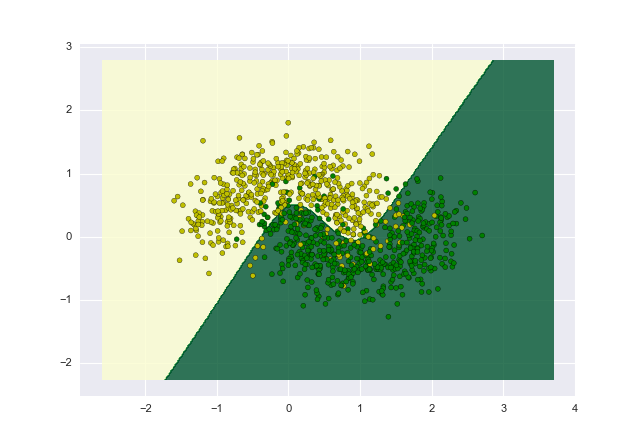

The accuracy is: 90.9 %


In [21]:
# Plot the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111)
h = .02
x_min, x_max = X[0, :].min() - 1, X[0,:].max() + 1
y_min, y_max = X[1,:].min() - 1, X[1,:].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

input = np.c_[xx.ravel(),yy.ravel()].T
Z = predict(W_ih, W_ho, bi_h, bi_o, input)
Z = Z.reshape(xx.shape)
cm = plt.cm.YlGn
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
col = np.where(Y==-1,'y','g')
ax.scatter(X[0, :],X[1,:],c=col)
plt.show()

# Print accuracy
Y_pred = predict(W_ih, W_ho, bi_h, bi_o, X)
correct = np.sum(Y == Y_pred)
print("The accuracy is: " + str(correct/N * 100)+" %")

Wow! This looks great and has an accuracy of 90%. What does this mean? The network has learnt to separate the points using a curve. Any point below the curve is declared as green and above the curve as yellow. Recall from our single neuron classifier, the decision surface was just a simple line which had an accuracy of only 85% whereas this neural network learnt to separate using a curve which is more accurate. That's the power of neural networks!

In this notebook, we extended the idea of single neuron classifier to a 3-layered neural network. And more importantly, for the problem we considered, which was not well solved by a single neuron, is solved better by this layered neural network. 

To generalize this idea to N-layered neural network, refer to the notebook!